In [14]:
import plot_large_heatmap as plh
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import umap

In [2]:
# Variables for creating the dataframes of module distances

rwr_res_path = '../00_Data/RWR_results/rwr_ranking_seeds_30_gene-multiplex-130924/'
rwr_file_prefix = 'rwr_ranking_'
rwr_file_suffix = '_seeds_30_gene-multiplex-130924.csv'
distances_res_path = '../00_Data/Distance_results/distances_seeds_30_gene-multiplex-130924_module_50/'
distances_file_prefix = 'distances_'
distances_file_suffix = '_seeds_30_gene-multiplex-130924_module_50.csv'
rwr_max_rank = 50
rwr_min_rank =  0
drop_cols = []

In [3]:
# List of similar diseases
similar_ls = [('Atypical_absence_seizure', 'Focal_aware_seizure'), ('Pyelonephritis', 'Prostatitis'), ('Gangrene', 'Intermittent_claudication'), ('Fibrosarcoma', 'Rhabdomyosarcoma'), ('Atypical_absence_seizure', 'West_syndrome'), ('Infection_of_bone', 'Prostatitis'), ('Seizure', 'Temporal_lobe_epilepsy'), ('Abnormality_of_the_coagulation_cascade', 'Factor_VII_deficiency'), ('Nephroblastoma', 'Neoplasm_of_uterus'), ('Atonic_seizure', 'Focal_aware_seizure'), ('Episcleritis', 'Keratitis'), ('Myalgia', 'Abdominal_pain'), ('Skin_ulcer', 'Macular_degeneration'), ('Spondylolysis', 'Trigeminal_neuralgia'), ('Nephrotic_syndrome', 'Kidney_failure'), ('Prostatitis', 'Otitis_media'), ('Episcleritis', 'Conjunctivitis'), ('Ewing_sarcoma', 'Retinoblastoma'), ('Urinary_bladder_inflammation', 'Pneumonia'), ('Nephrotic_syndrome', 'Intermittent_claudication'), ('Gingivostomatitis', 'Gingival_disorder'), ('Periodontitis', 'Osteomyelitis'), ('Epididymitis', 'Otitis_media'), ('Spondylolysis', 'Spinal_cord_tumor'), ('Sinusitis', 'Otitis_media'), ('myoclonic_epilepsy', 'Absence_seizure'), ('Periodontitis', 'Otitis_media'), ('Intermittent_claudication', 'Renal_insufficiency'), ('West_syndrome', 'Atonic_seizure'), ('Episcleritis', 'Blepharitis'), ('Absence_seizure', 'Atonic_seizure'), ('Joint_hemorrhage', 'Hereditary_factor_IX_deficiency_disease'), ('Thrombophlebitis', 'Thrombophilia'), ('Severe_myoclonic_epilepsy_in_infancy', 'Status_epilepticus'), ('Exanthem', 'Keratitis'), ('Renal_neoplasm', 'Neoplasm_of_the_skin'), ('Benign_Neonatal_Epilepsy', 'myoclonic_epilepsy'), ('Temporal_lobe_epilepsy', 'myoclonic_epilepsy'), ('Severe_myoclonic_epilepsy_in_infancy', 'Atypical_absence_seizure'), ('Head_and_neck_neoplasm', 'Carcinoma_of_pancreas'), ('Kidney_failure', 'Kidney_damage'), ('myoclonic_epilepsy', 'Focal_aware_seizure'), ('myoclonic_epilepsy', 'Atonic_seizure'), ('Carcinoma_of_pancreas', 'Rectal_neoplasm'), ('Benign_Neonatal_Epilepsy', 'Atypical_absence_seizure'), ('Temporal_lobe_epilepsy', 'Atypical_absence_seizure'), ('Muscle_spasm', 'Spondylolysis'), ('Severe_myoclonic_epilepsy_in_infancy', 'Atonic_seizure'), ('Prostatitis', 'Urinary_bladder_inflammation'), ('Erythroderma', 'Exanthem'), ('Vitiligo', 'Hyperpigmentation_of_the_skin'), ('Type_2_diabetes_mellitus', 'Diabetes_mellitus_type_1'), ('Benign_Neonatal_Epilepsy', 'Focal_aware_seizure'), ('Temporal_lobe_epilepsy', 'Focal_aware_seizure'), ('Kidney_damage', 'Renal_insufficiency'), ('Hyperkeratosis', 'Palmoplantar_keratosis'), ('Cholelithiasis', 'Primary_biliary_cholangitis'), ('Epididymitis', 'Urinary_bladder_inflammation'), ('Ichthyosis', 'Hyperkeratosis'), ('Prostatitis', 'Cholangitis'), ('Seizure', 'Focal_aware_seizure'), ('Benign_Neonatal_Epilepsy', 'Atonic_seizure'), ('Severe_myoclonic_epilepsy_in_infancy', 'Benign_Neonatal_Epilepsy'), ('Epilepsy', 'Absence_seizure'), ('Eczematoid_dermatitis', 'Exanthem'), ('Urinary_bladder_inflammation', 'Periodontitis'), ('Status_epilepticus', 'myoclonic_epilepsy'), ('Epididymitis', 'Gingival_disorder'), ('Temporal_lobe_epilepsy', 'Atonic_seizure'), ('Urinary_bladder_inflammation', 'Osteomyelitis'), ('Seizure', 'West_syndrome'), ('Hyperkeratosis', 'Ichthyosis_vulgaris'), ('Purpura', 'Pulmonary_arterial_hypertension'), ('Status_epilepticus', 'Absence_seizure'), ('Gingivostomatitis', 'Periodontitis'), ('Head_and_neck_neoplasm', 'Neoplasm_of_the_pancreas'), ('Esophagitis', 'Gastroesophageal_reflux_disease'), ('Epididymitis', 'Cholangitis'), ('Muscle_spasm', 'Cerebral_palsy'), ('Sinusitis', 'Cholangitis'), ('Gingivostomatitis', 'Pneumonia'), ('Periodontitis', 'Cholangitis'), ('Colon_cancer', 'Carcinoma_of_pancreas'), ('Head_and_neck_neoplasm', 'Colon_cancer'), ('Head_and_neck_neoplasm', 'Colonic_neoplasm'), ('Joint_hemorrhage', 'Factor_VII_deficiency'), ('Peptic_ulcer', 'Gastroesophageal_reflux_disease'), ('Hypogonadism', 'Delayed_puberty'), ('Infection_of_bone', 'Urinary_bladder_inflammation'), ('Nephrotic_syndrome', 'Kidney_damage'), ('Chorea', 'Extrapyramidal_disease'), ('Temporal_lobe_epilepsy', 'Benign_Neonatal_Epilepsy'), ('Neoplasm_of_lung', 'Nephroblastoma'), ('West_syndrome', 'Focal_aware_seizure'), ('Infection_of_bone', 'Pneumonia'), ('Erythroderma', 'Conjunctivitis'), ('Back_pain', 'Myalgia'), ('Seizure', 'Benign_Neonatal_Epilepsy'), ('Cardiomyopathy', 'Thrombophlebitis'), ('Cholangitis', 'Otitis_media'), ('Renovascular_hypertension', 'Renal_insufficiency'), ('Infection_of_bone', 'Cholangitis'), ('Ewing_sarcoma', 'Nephroblastoma'), ('Status_epilepticus', 'Focal_aware_seizure'), ('Gastroesophageal_reflux_disease', 'Heartburn'), ('Temporal_lobe_epilepsy', 'Epilepsy'), ('Eczematoid_dermatitis', 'Conjunctivitis'), ('Head_and_neck_cancer', 'Carcinoma_of_pancreas'), ('Status_epilepticus', 'Atonic_seizure'), ('Eczematoid_dermatitis', 'Ichthyosis_vulgaris'), ('Head_and_neck_neoplasm', 'Rectal_neoplasm'), ('Epididymitis', 'Gingivostomatitis'), ('Benign_Neonatal_Epilepsy', 'Status_epilepticus'), ('myoclonic_epilepsy', 'West_syndrome'), ('Colon_cancer', 'Neoplasm_of_the_pancreas'), ('Gastrointestinal_hemorrhage', 'Systemic_mast_cell_disease'), ('Pityriasis_rubra_pilaris', 'Ichthyosis'), ('Temporal_lobe_epilepsy', 'Status_epilepticus'), ('Osteomyelitis', 'Cholangitis'), ('Ewing_sarcoma', 'Fibrosarcoma'), ('Epilepsy', 'Benign_Neonatal_Epilepsy'), ('Seizure', 'Status_epilepticus'), ('Pulmonary_fibrosis', 'Hypersensitivity_pneumonitis'), ('Back_pain', 'Arthralgia'), ('Hepatocellular_carcinoma', 'Skin_ulcer'), ('Gynecomastia', 'Precocious_puberty'), ('Emphysema', 'Bronchiectasis'), ('Prostatitis', 'Pneumonia'), ('Peritonitis', 'Cholangitis'), ('Infection_of_bone', 'Gingivostomatitis'), ('Spondylolysis', 'Cerebral_palsy'), ('Conjunctivitis', 'Erysipelas'), ('Epilepsy', 'myoclonic_epilepsy'), ('Ewing_sarcoma', 'Sarcoma'), ('Benign_Neonatal_Epilepsy', 'West_syndrome'), ('Temporal_lobe_epilepsy', 'West_syndrome'), ('Epididymitis', 'Pneumonia'), ('Pneumonia', 'Otitis_media'), ('Atypical_absence_seizure', 'myoclonic_epilepsy'), ('Sinusitis', 'Pneumonia'), ('Periodontitis', 'Pneumonia'), ('Gingivostomatitis', 'Osteomyelitis'), ('Retinoblastoma', 'Nephroblastoma'), ('Atypical_absence_seizure', 'Absence_seizure'), ('Epilepsy', 'Status_epilepticus'), ('Colonic_neoplasm', 'Carcinoma_of_pancreas'), ('Gingivostomatitis', 'Otitis_media'), ('Thyroid_tumor', 'Goiter'), ('Gingival_disorder', 'Periodontitis'), ('Head_and_neck_cancer', 'Colonic_neoplasm'), ('Colon_cancer', 'Rectal_neoplasm'), ('Glioma', 'Medulloblastoma'), ('Head_and_neck_cancer', 'Colon_cancer'), ('Gingivostomatitis', 'Sinusitis'), ('Epilepsy', 'Atypical_absence_seizure'), ('Infection_of_bone', 'Periodontitis'), ('Huntington_disease', 'Spondylolysis'), ('Gout', 'Myalgia'), ('Ovarian_cancer', 'Small_cell_lung_carcinoma'), ('Infection_of_bone', 'Sinusitis'), ('Atonic_seizure', 'Absence_seizure'), ('Bladder_neoplasm', 'Osteosarcoma'), ('Epilepsy', 'Focal_aware_seizure'), ('Stomatitis', 'Pneumonia'), ('Infection_of_bone', 'Epididymitis'), ('Gingivostomatitis', 'Prostatitis'), ('Essential_hypertension', 'Renovascular_hypertension'), ('Status_epilepticus', 'West_syndrome'), ('Cholelithiasis', 'Biliary_cirrhosis'), ('Dysuria', 'Pancreatitis'), ('Erythroderma', 'Blepharitis'), ('Atypical_absence_seizure', 'Atonic_seizure'), ('Head_and_neck_cancer', 'Rectal_neoplasm'), ('Intermittent_claudication', 'Kidney_damage'), ('Squamous_cell_carcinoma', 'Kaposi_sarcoma'), ('Neoplasm_of_esophagus', 'Neoplasm_of_stomach'), ('Cellulitis', 'Cholangitis'), ('Factor_VII_deficiency', 'Hereditary_factor_IX_deficiency_disease'), ('Ichthyosis', 'Ichthyosis_vulgaris'), ('Nephrotic_syndrome', 'Renal_insufficiency'), ('Neoplasm_of_the_pancreas', 'Rectal_neoplasm'), ('Abnormality_of_the_coagulation_cascade', 'Hereditary_factor_IX_deficiency_disease'), ('Orchitis', 'Cryptorchidism'), ('Prostatitis', 'Sinusitis'), ('Pulmonary_arterial_hypertension', 'Pulmonary_hypertension'), ('Hepatocellular_carcinoma', 'Macular_degeneration'), ('Peripheral_arterial_disease', 'Coronary_artery_disorder'), ('Ewing_sarcoma', 'Rhabdomyosarcoma'), ('Head_and_neck_cancer', 'Squamous_cell_carcinoma_of_the_head_and_neck'), ('Epididymitis', 'Periodontitis'), ('Sinusitis', 'Osteomyelitis'), ('Epididymitis', 'Osteomyelitis'), ('Sinusitis', 'Periodontitis'), ('Urinary_bladder_inflammation', 'Cholangitis'), ('Epididymitis', 'Sinusitis'), ('Kidney_failure', 'Renovascular_hypertension'), ('Arthralgia', 'Myalgia'), ('Cirrhosis_of_liver', 'Ascites'), ('Erythroderma', 'Eczematoid_dermatitis'), ('Colonic_neoplasm', 'Rectal_neoplasm'), ('Infection_of_bone', 'Osteomyelitis'), ('Atypical_absence_seizure', 'Status_epilepticus'), ('Pyelonephritis', 'Epididymitis'), ('Severe_myoclonic_epilepsy_in_infancy', 'Temporal_lobe_epilepsy'), ('Kidney_failure', 'Intermittent_claudication'), ('Epididymitis', 'Prostatitis'), ('Osteosarcoma', 'Sarcoma')]
# List of dissimilar diseases
non_similar = [('Primary_dilated_cardiomyopathy', 'Thrombophlebitis'), ('Acute_intermittent_porphyria', 'Oligomenorrhea'), ('Methylmalonic_acidemia', 'Oligomenorrhea'), ('Dystonic_disorder', 'Bronchiolitis'), ('Urticaria', 'beta_Thalassemia'), ('Primary_dilated_cardiomyopathy', 'Uveitis'), ('Extrapyramidal_disease', 'Mastocytosis'), ('Orchitis', 'Primary_dilated_cardiomyopathy'), ('Chorea', 'Renal_tubular_acidosis'), ('Primary_dilated_cardiomyopathy', 'Renal_neoplasm'), ('Inflammatory_bowel_disease', 'Extrapyramidal_disease'), ('Ewing_sarcoma', 'Primary_dilated_cardiomyopathy'), ('Cervical_cancer', 'Diabetes_mellitus_type_1'), ('Infection_of_bone', 'West_syndrome'), ('West_syndrome', 'Bronchiolitis'), ('beta_Thalassemia', 'Coarctation_of_aorta'), ('Tetralogy_of_Fallot', 'Vitiligo'), ('Renal_tubular_acidosis', 'Cervical_cancer'), ('Orchitis', 'Respiratory_insufficiency'), ('Chorea', 'Rhabdomyosarcoma'), ('Primary_dilated_cardiomyopathy', 'Urticaria'), ('Primary_dilated_cardiomyopathy', 'Factor_VII_deficiency'), ('Movement_disorder', 'Coronary_artery_disorder'), ('Primary_dilated_cardiomyopathy', 'Dermatographic_urticaria'), ('Fibrosarcoma', 'Diabetes_mellitus_type_1'), ('West_syndrome', 'Familial_multiple_polyposis_syndrome'), ('Respiratory_insufficiency', 'Methylmalonic_acidemia'), ('Cholecystitis', 'Factor_VII_deficiency'), ('Gastrointestinal_hemorrhage', 'beta_Thalassemia'), ('Hepatocellular_carcinoma', 'Oligomenorrhea'), ('Joint_hemorrhage', 'beta_Thalassemia'), ('Severe_myoclonic_epilepsy_in_infancy', 'Mastocytosis'), ('Tetralogy_of_Fallot', 'beta_Thalassemia'), ('Nocturia', 'Primary_dilated_cardiomyopathy'), ('Chorea', 'Goiter'), ('Nasal_polyposis', 'West_syndrome'), ('Inflammatory_bowel_disease', 'Primary_dilated_cardiomyopathy'), ('Renal_tubular_acidosis', 'Adrenogenital_syndrome'), ('Cholecystitis', 'Narcolepsy'), ('beta_Thalassemia', 'Narcolepsy'), ('Inflammatory_bowel_disease', 'Renal_tubular_acidosis'), ('Celiac_disease', 'Alcohol_dependence'), ('Chorea', 'Orchitis'), ('Orchitis', 'Dystonic_disorder'), ('Chorea', 'Mastocytosis'), ('Extrapyramidal_disease', 'Thrombophilia'), ('beta_Thalassemia', 'Goiter'), ('Biliary_cirrhosis', 'Factor_VII_deficiency'), ('Respiratory_insufficiency', 'beta_Thalassemia'), ('Primary_dilated_cardiomyopathy', 'Carcinoma_of_pancreas'), ('Renal_tubular_acidosis', 'West_syndrome'), ('Celiac_disease', 'Primary_dilated_cardiomyopathy'), ('Primary_dilated_cardiomyopathy', 'Crohn_disease'), ('Severe_myoclonic_epilepsy_in_infancy', 'Corneal_ulceration'), ('beta_Thalassemia', 'Urinary_retention'), ('Primary_dilated_cardiomyopathy', 'Hemorrhagic_disease'), ('Primary_dilated_cardiomyopathy', 'Cervical_cancer'), ('West_syndrome', 'Diabetes_mellitus_type_1'), ('Primary_dilated_cardiomyopathy', 'Erythema_nodosum'), ('Disorder_of_lung', 'beta_Thalassemia'), ('Extrapyramidal_disease', 'Factor_VII_deficiency'), ('Renal_tubular_acidosis', 'Cerebral_palsy'), ('Nasal_polyposis', 'myoclonic_epilepsy'), ('Extrapyramidal_disease', 'Endometrial_carcinoma'), ('Movement_disorder', 'beta_Thalassemia'), ('Biliary_cirrhosis', 'Absence_seizure'), ('Chorea', 'Hereditary_antithrombin_deficiency'), ('Crohn_disease', 'Coarctation_of_aorta'), ('Epilepsy', 'beta_Thalassemia'), ('Movement_disorder', 'Hereditary_factor_IX_deficiency_disease'), ('Nasal_polyposis', 'Methylmalonic_acidemia'), ('Extrapyramidal_disease', 'Joint_hemorrhage'), ('Chorea', 'Coarctation_of_aorta'), ('Eczematoid_dermatitis', 'Primary_dilated_cardiomyopathy'), ('West_syndrome', 'beta_Thalassemia'), ('Primary_dilated_cardiomyopathy', 'Immunodeficiency'), ('Extrapyramidal_disease', 'Primary_dilated_cardiomyopathy'), ('Chorea', 'Nasal_polyposis'), ('Movement_disorder', 'Primary_dilated_cardiomyopathy'), ('Chorea', 'Inflammatory_bowel_disease'), ('Renal_tubular_acidosis', 'Cerebral_edema'), ('Primary_dilated_cardiomyopathy', 'Kaposi_sarcoma'), ('myoclonic_epilepsy', 'Familial_multiple_polyposis_syndrome'), ('Renal_tubular_acidosis', 'Systemic_mast_cell_disease'), ('Chorea', 'Thrombophilia'), ('Tetralogy_of_Fallot', 'Celiac_disease'), ('myoclonic_epilepsy', 'beta_Thalassemia'), ('Chorea', 'Hepatocellular_carcinoma'), ('Celiac_disease', 'Strabismus'), ('Multiple_myeloma', 'Primary_dilated_cardiomyopathy'), ('Extrapyramidal_disease', 'Coarctation_of_aorta'), ('Severe_myoclonic_epilepsy_in_infancy', 'beta_Thalassemia'), ('Chorea', 'Oligomenorrhea'), ('Primary_dilated_cardiomyopathy', 'Delayed_puberty'), ('Dystonic_disorder', 'Primary_dilated_cardiomyopathy'), ('Tetralogy_of_Fallot', 'Cervical_cancer'), ('Extrapyramidal_disease', 'Urticaria'), ('Movement_disorder', 'Factor_VII_deficiency'), ('Primary_dilated_cardiomyopathy', 'Myelodysplastic_syndrome'), ('Chorea', 'Celiac_disease'), ('Renal_tubular_acidosis', 'Movement_disorder'), ('West_syndrome', 'Primary_dilated_cardiomyopathy'), ('beta_Thalassemia', 'Kidney_damage'), ('Cataplexy_and_narcolepsy', 'Primary_dilated_cardiomyopathy'), ('Hypertrophic_cardiomyopathy', 'Renal_tubular_acidosis'), ('Extrapyramidal_disease', 'Biliary_cirrhosis'), ('beta_Thalassemia', 'Atonic_seizure'), ('Adrenogenital_syndrome', 'Autoimmune_disease'), ('Abetalipoproteinaemia', 'Primary_dilated_cardiomyopathy'), ('Severe_myoclonic_epilepsy_in_infancy', 'Skin_disorder'), ('Chorea', 'Encephalitis'), ('Skin_disorder', 'West_syndrome'), ('Thrombophilia', 'Biliary_cirrhosis'), ('Renal_tubular_acidosis', 'Rhabdomyosarcoma'), ('Renal_tubular_acidosis', 'Decreased_circulating_vitamin_B1_concentration'), ('Extrapyramidal_disease', 'Hereditary_factor_IX_deficiency_disease'), ('Primary_dilated_cardiomyopathy', 'Urinary_retention'), ('Extrapyramidal_disease', 'Bronchiolitis'), ('Adrenogenital_syndrome', 'Immunodeficiency'), ('Primary_dilated_cardiomyopathy', 'Exanthem'), ('Ewing_sarcoma', 'Chorea'), ('Primary_dilated_cardiomyopathy', 'Familial_multiple_polyposis_syndrome'), ('Urticaria', 'Oligomenorrhea'), ('Ewing_sarcoma', 'Diabetes_mellitus_type_1'), ('myoclonic_epilepsy', 'Bronchiolitis'), ('Cholelithiasis', 'Factor_VII_deficiency'), ('Myopathy', 'West_syndrome'), ('Chorea', 'Coronary_artery_disorder'), ('Primary_dilated_cardiomyopathy', 'Cryptorchidism'), ('Dystonic_disorder', 'Goiter'), ('Tetralogy_of_Fallot', 'Familial_multiple_polyposis_syndrome'), ('Joint_hemorrhage', 'Dystonic_disorder'), ('Cholecystitis', 'Cataplexy_and_narcolepsy'), ('Mastocytosis', 'Absence_seizure'), ('Respiratory_insufficiency', 'Dystonic_disorder'), ('Renal_tubular_acidosis', 'Extrapyramidal_disease'), ('Mastocytosis', 'Dystonic_disorder'), ('Respiratory_insufficiency', 'Oligomenorrhea'), ('Chorea', 'Dermatitis'), ('Prostate_neoplasm', 'Chorea'), ('Renal_tubular_acidosis', 'Alcohol_dependence'), ('Celiac_disease', 'Adrenogenital_syndrome'), ('Renal_tubular_acidosis', 'Nocturia'), ('Gouty_arthropathy', 'Primary_dilated_cardiomyopathy'), ('Vitiligo', 'Primary_dilated_cardiomyopathy'), ('Extrapyramidal_disease', 'Rhabdomyosarcoma'), ('Inflammatory_bowel_disease', 'Dystonic_disorder'), ('Chorea', 'Primary_dilated_cardiomyopathy'), ('Severe_myoclonic_epilepsy_in_infancy', 'Myopathy'), ('Movement_disorder', 'Orchitis'), ('Epididymitis', 'West_syndrome'), ('Renal_tubular_acidosis', 'Biliary_cirrhosis'), ('Hereditary_antithrombin_deficiency', 'Primary_dilated_cardiomyopathy'), ('Chorea', 'Respiratory_insufficiency'), ('Chorea', 'Urticaria'), ('Mastocytosis', 'West_syndrome'), ('Hypertrophic_cardiomyopathy', 'beta_Thalassemia'), ('Chorea', 'Tetralogy_of_Fallot'), ('Primary_dilated_cardiomyopathy', 'Blepharitis'), ('Celiac_disease', 'Dystonic_disorder'), ('Chorea', 'Joint_hemorrhage'), ('Severe_myoclonic_epilepsy_in_infancy', 'Immunodeficiency'), ('Abetalipoproteinaemia', 'beta_Thalassemia'), ('Renal_tubular_acidosis', 'Oligomenorrhea'), ('Chorea', 'Cholecystitis'), ('West_syndrome', 'Exanthem'), ('Pulmonary_fibrosis', 'Primary_dilated_cardiomyopathy'), ('Renal_tubular_acidosis', 'Cholecystitis'), ('Severe_myoclonic_epilepsy_in_infancy', 'Primary_dilated_cardiomyopathy'), ('Renal_tubular_acidosis', 'Celiac_disease'), ('Primary_dilated_cardiomyopathy', 'Germ_cell_tumor_of_testis'), ('Primary_dilated_cardiomyopathy', 'Strabismus'), ('Celiac_disease', 'Oligomenorrhea'), ('Myopathy', 'beta_Thalassemia'), ('Chorea', 'Enterocolitis'), ('beta_Thalassemia', 'Absence_seizure'), ('Chorea', 'Bronchiolitis'), ('West_syndrome', 'Immunodeficiency'), ('Chorea', 'Hereditary_factor_IX_deficiency_disease'), ('Primary_dilated_cardiomyopathy', 'beta_Thalassemia'), ('Oligomenorrhea', 'Autoimmune_disease'), ('Respiratory_insufficiency', 'Primary_dilated_cardiomyopathy'), ('Renal_tubular_acidosis', 'Familial_multiple_polyposis_syndrome'), ('Urticaria', 'Coarctation_of_aorta'), ('Cataplexy_and_narcolepsy', 'beta_Thalassemia'), ('Extrapyramidal_disease', 'Hereditary_antithrombin_deficiency'), ('myoclonic_epilepsy', 'Primary_dilated_cardiomyopathy'), ('Extrapyramidal_disease', 'Respiratory_insufficiency'), ('Primary_dilated_cardiomyopathy', 'Acute_intermittent_porphyria'), ('Respiratory_insufficiency', 'myoclonic_epilepsy'), ('Bronchiolitis', 'Absence_seizure'), ('Chorea', 'Periodontitis'), ('Purpura', 'Primary_dilated_cardiomyopathy'), ('Familial_multiple_polyposis_syndrome', 'Coarctation_of_aorta'), ('Renal_tubular_acidosis', 'Spinal_cord_tumor'), ('Melanoma', 'Primary_dilated_cardiomyopathy'), ('West_syndrome', 'Urticaria'), ('Renal_tubular_acidosis', 'Cholelithiasis'), ('Severe_myoclonic_epilepsy_in_infancy', 'Respiratory_insufficiency'), ('Immunodeficiency', 'Oligomenorrhea'), ('Respiratory_insufficiency', 'Factor_VII_deficiency')]
# List of genetically similar diseases
sim_genes = [('Small_cell_lung_carcinoma', 'Medulloblastoma'), ('Dysuria', 'Facial_paralysis'), ('Seasonal_allergy', 'Cough'), ('Hepatic_encephalopathy', 'Conjunctivitis'), ('Small_cell_lung_carcinoma', 'Uterine_leiomyoma'), ('Hepatic_encephalopathy', 'Facial_paralysis'), ('Cellulitis', 'Pneumonia'), ('Chapped_lip', 'Ichthyosis'), ('Neoplasm_of_esophagus', 'Fibrosarcoma'), ('Neoplasm_of_stomach', 'Uterine_leiomyoma'), ('Metrorrhagia', 'Dyspareunia'), ('Pulmonary_fibrosis', 'Autoimmune_disease'), ('Pruritus', 'Dysuria'), ('Cardiomyopathy', 'Stroke_disorder'), ('Migraine', 'Alzheimer_disease'), ('Cryptorchidism', 'Testicular_neoplasm'), ('Hypogonadism', 'Erectile_dysfunction'), ('Gingival_disorder', 'Diarrhea'), ('Pyelonephritis', 'Sepsis'), ('Menorrhagia', 'Abdominal_pain'), ('Cervical_cancer', 'Osteosarcoma'), ('Basal_cell_carcinoma', 'Small_cell_lung_carcinoma'), ('Malnutrition', 'Dyssomnia'), ('Ovarian_cyst', 'Oligomenorrhea'), ('Hepatic_encephalopathy', 'Crohn_disease'), ('Dermatitis', 'Enterocolitis'), ('Prostatitis', 'Cellulitis'), ('Bronchiolitis', 'Encephalitis'), ('Neoplasm_of_the_large_intestine', 'Kaposi_sarcoma'), ('Laryngeal_edema', 'Facial_paralysis'), ('Prostate_neoplasm', 'Retinoblastoma'), ('Coronary_artery_disorder', 'Ischemic_stroke'), ('Bladder_neoplasm', 'Rhabdomyosarcoma'), ('Sepsis', 'Sinusitis'), ('Neoplasm_of_lung', 'Vitamin_K_deficiency'), ('Pruritus', 'Vitamin_K_deficiency'), ('Dysuria', 'Dermatographic_urticaria'), ('Neoplasm_of_lung', 'Uterine_leiomyoma'), ('Pulmonary_hypertension', 'Ischemic_stroke'), ('Bladder_neoplasm', 'Cervical_cancer'), ('Periodontitis', 'Cellulitis'), ('Deep_venous_thrombosis', 'Peripheral_vascular_disease'), ('Muscle_spasm', 'Focal_aware_seizure'), ('Otitis_media', 'Disorder_of_orbital_region'), ('Periodontitis', 'Meningitis'), ('Neoplasm_of_esophagus', 'Small_cell_lung_carcinoma'), ('Pulmonary_fibrosis', 'Celiac_disease'), ('Essential_hypertension', 'Erectile_dysfunction'), ('Retinoblastoma', 'Colon_cancer'), ('Prostate_neoplasm', 'Breast_neoplasm'), ('Hepatocellular_carcinoma', 'Thyroid_tumor'), ('Prostate_neoplasm', 'Neoplasm_of_ovary'), ('Multiple_myeloma', 'Kaposi_sarcoma'), ('Diabetes_mellitus', 'Stroke_disorder'), ('Prostate_neoplasm', 'Squamous_cell_carcinoma_of_the_head_and_neck'), ('Rhabdomyosarcoma', 'Neoplasm_of_uterus'), ('Squamous_cell_carcinoma', 'Medulloblastoma'), ('Germ_cell_tumor_of_testis', 'Lymphoma'), ('Cellulitis', 'Otitis_media'), ('Cataplexy_and_narcolepsy', 'Obesity'), ('Pityriasis_rubra_pilaris', 'Fatigue'), ('Head_and_neck_neoplasm', 'Neoplasm_of_the_large_intestine'), ('Hepatocellular_carcinoma', 'Neoplasm_of_the_skin'), ('Allergic_rhinitis', 'Narcolepsy'), ('Menorrhagia', 'Glanzmann_thrombasthenia'), ('Myositis_disease', 'Peritonitis'), ('Pulmonary_fibrosis', 'Disorder_of_orbital_region'), ('Prostate_neoplasm', 'Lymphoma'), ('Osteomyelitis', 'Encephalitis'), ('Peritonitis', 'Cellulitis'), ('Erythema_multiforme', 'Hepatic_encephalopathy'), ('Priapism', 'Fatigue'), ('Renal_cell_carcinoma', 'Testicular_neoplasm'), ('Fibrosarcoma', 'Uterine_leiomyoma'), ('Fatigue', 'Malnutrition'), ('Gingival_disorder', 'Pericarditis'), ('Hypertensive_disorder', 'Coronary_artery_disorder'), ('Premature_ovarian_failure', 'Joint_hemorrhage'), ('Sepsis', 'Osteomyelitis'), ('Malnutrition', 'Heartburn'), ('Pruritus', 'Dyssomnia'), ('Menorrhagia', 'Endometrial_carcinoma'), ('Gingival_disorder', 'Disorder_of_orbital_region'), ('Disorder_of_orbital_region', 'Optic_neuritis'), ('Erythema_multiforme', 'Acute_febrile_mucocutaneous_lymph_node_syndrome'), ('Migraine', 'Menorrhagia'), ('Sepsis', 'Otitis_media'), ('Menorrhagia', 'Premature_ovarian_failure'), ('Exanthem', 'Disorder_of_orbital_region'), ('Peripheral_vascular_disease', 'Cardiomyopathy'), ('Peptic_ulcer', 'Tremor'), ('Eczematoid_dermatitis', 'Hepatic_encephalopathy'), ('Pyelonephritis', 'Gingival_disorder'), ('Migraine', 'Nasal_congestion'), ('Diarrhea', 'Osteomyelitis'), ('Cardiomyopathy', 'Ischemic_stroke'), ('Rhabdomyosarcoma', 'Testicular_neoplasm'), ('Pyelonephritis', 'Cholangitis'), ('Diarrhea', 'Otitis_media'), ('Pruritus', 'Diarrhea'), ('Erysipelas', 'Pericarditis'), ('Bladder_neoplasm', 'Medulloblastoma'), ('Lymphangiomyomatosis', 'Testicular_neoplasm'), ('Prostate_neoplasm', 'Head_and_neck_cancer'), ('Basal_cell_carcinoma', 'Renal_neoplasm'), ('Pyelonephritis', 'Duodenal_ulcer'), ('Diabetes_insipidus', 'Glanzmann_thrombasthenia'), ('Hepatic_encephalopathy', 'Ulcerative_colitis'), ('Uterine_leiomyoma', 'Metrorrhagia'), ('Fibrosarcoma', 'Neoplasm_of_uterus'), ('Cholangitis', 'Erysipelas'), ('Hypersensitivity_pneumonitis', 'Keloid'), ('Benign_Neonatal_Epilepsy', 'Alzheimer_disease'), ('Keloid', 'Conjunctivitis'), ('Renovascular_hypertension', 'Ischemic_stroke'), ('Cellulitis', 'Stomatitis'), ('Acute_febrile_mucocutaneous_lymph_node_syndrome', 'Disorder_of_orbital_region'), ('Urinary_bladder_inflammation', 'Sepsis'), ('Small_cell_lung_carcinoma', 'Neoplasm_of_the_large_intestine'), ('Pulmonary_fibrosis', 'Vitiligo'), ('Gingivostomatitis', 'Sepsis'), ('Nephroblastoma', 'Disorder_of_orbital_region'), ('Pulmonary_edema', 'Cardiomyopathy'), ('Glioma', 'Colonic_neoplasm'), ('Erythema_multiforme', 'Keloid'), ('Preeclampsia', 'Essential_tremor'), ('Erythroderma', 'Keloid'), ('Peritonitis', 'Gingival_disorder'), ('Pyelonephritis', 'Peritonitis'), ('Pyelonephritis', 'Bronchiolitis'), ('Type_2_diabetes_mellitus', 'Facial_paralysis'), ('Cardiomyopathy', 'Renovascular_hypertension'), ('Peripheral_vascular_disease', 'Kidney_failure'), ('Status_epilepticus', 'Alzheimer_disease'), ('Urinary_bladder_inflammation', 'Cellulitis'), ('Heartburn', 'Stomatitis'), ('Dermatitis', 'Keloid'), ('Keloid', 'Disorder_of_orbital_region'), ('Cryptorchidism', 'Erectile_dysfunction'), ('Neoplasm_of_lung', 'Neoplasm_of_brain'), ('Priapism', 'Pancreatitis'), ('Neoplasm_of_esophagus', 'Medulloblastoma'), ('Disorder_of_orbital_region', 'Keratitis'), ('Diarrhea', 'Cholangitis'), ('Angioedema', 'Facial_paralysis'), ('Allergic_rhinitis', 'Enterocolitis'), ('Peptic_ulcer', 'Cough'), ('Peripheral_vascular_disease', 'Renovascular_hypertension'), ('Renal_neoplasm', 'Rectal_neoplasm'), ('Facial_paralysis', 'Anorexia'), ('Hepatic_encephalopathy', 'Otitis_media'), ('Prostate_neoplasm', 'Small_cell_lung_carcinoma'), ('Pulmonary_arterial_hypertension', 'Ischemic_stroke'), ('Cholangitis', 'Duodenal_ulcer'), ('Tetralogy_of_Fallot', 'Purpura'), ('Hepatic_encephalopathy', 'Erysipelas'), ('Heartburn', 'Dyssomnia'), ('Cataplexy_and_narcolepsy', 'Chronic_pain'), ('Melanoma', 'Neoplasm_of_brain'), ('Renovascular_hypertension', 'Vasculitis'), ('Laryngeal_edema', 'Hepatic_encephalopathy'), ('Diabetes_insipidus', 'Hereditary_factor_IX_deficiency_disease'), ('Episcleritis', 'Hepatic_encephalopathy'), ('Otitis_media', 'Erysipelas'), ('Basal_cell_carcinoma', 'Ichthyosis_vulgaris'), ('Premature_ovarian_failure', 'Erectile_dysfunction'), ('Skin_disorder', 'Purpura'), ('Head_and_neck_neoplasm', 'Nephroblastoma'), ('Squamous_cell_carcinoma', 'Multiple_myeloma'), ('Thrombophilia', 'Stroke_disorder'), ('Gingival_disorder', 'Sepsis'), ('Chronic_pain', 'Narcolepsy'), ('Basal_cell_carcinoma', 'Testicular_neoplasm'), ('Infection_of_bone', 'Sepsis'), ('Benign_Neonatal_Epilepsy', 'Essential_tremor'), ('Erythroderma', 'Disorder_of_orbital_region'), ('Precocious_puberty', 'Neoplasm_of_the_pancreas'), ('Fibrosarcoma', 'Small_cell_lung_carcinoma'), ('Gout', 'Abdominal_pain'), ('Preeclampsia', 'Renovascular_hypertension'), ('Constipation', 'Dyssomnia'), ('Neoplasm_of_the_large_intestine', 'Osteosarcoma'), ('Small_cell_lung_carcinoma', 'Lymphoma'), ('Diarrhea', 'Chronic_pain'), ('Neoplasm_of_ovary', 'Germ_cell_tumor_of_testis'), ('Ulcerative_colitis', 'Erysipelas'), ('Pyelonephritis', 'Osteomyelitis'), ('Pyelonephritis', 'Periodontitis'), ('Glioma', 'Gastrointestinal_stromal_tumor'), ('Gingivostomatitis', 'Duodenal_ulcer'), ('Allergic_rhinitis', 'Cough'), ('Myositis_disease', 'Cellulitis'), ('Gingival_disorder', 'Cellulitis'), ('Nephroblastoma', 'Uterine_leiomyoma'), ('Dermatitis', 'Disorder_of_orbital_region'), ('Hepatic_encephalopathy', 'Erythema_nodosum'), ('Gout', 'Fatigue'), ('Myalgia', 'Gangrene'), ('Glioma', 'Testicular_neoplasm'), ('Purpura', 'Thrombophlebitis'), ('Fibrosarcoma', 'Bladder_neoplasm'), ('Colon_cancer', 'Testicular_neoplasm'), ('Bladder_neoplasm', 'Neoplasm_of_brain'), ('Gingival_disorder', 'Meningitis'), ('Diabetes_insipidus', 'Factor_VII_deficiency'), ('Prostatitis', 'Sepsis'), ('Heartburn', 'Cough')]
# List of symptomatically similar diseases
sim_symptoms = [('Bronchiectasis', 'Dermatographic_urticaria'), ('Erythroderma', 'Emphysema'), ('Episcleritis', 'Myelodysplastic_syndrome'), ('Rhinitis', 'Otitis_media'), ('Cholecystitis', 'Diarrhea'), ('Head_and_neck_cancer', 'Macular_degeneration'), ('Nocturia', 'Glaucoma'), ('Intracranial_swelling', 'Ulcerative_colitis'), ('Bronchiolitis', 'Primary_biliary_cholangitis'), ('Kidney_failure', 'Intracranial_swelling'), ('Abetalipoproteinaemia', 'Focal_aware_seizure'), ('Laryngeal_edema', 'Periodontitis'), ('Urinary_bladder_inflammation', 'Biliary_cirrhosis'), ('Inflammatory_bowel_disease', 'Respiratory_insufficiency'), ('Erythroderma', 'Intracranial_swelling'), ('Rosacea', 'Urticaria'), ('Atherosclerosis', 'Glaucoma'), ('Ascites', 'Keratitis'), ('Melanoma', 'Macular_degeneration'), ('Multiple_myeloma', 'Macular_degeneration'), ('Ovarian_cyst', 'Glaucoma'), ('Sepsis', 'Macular_degeneration'), ('Gangrene', 'Glaucoma'), ('Pleural_effusion', 'Erysipelas'), ('Infection_of_bone', 'Biliary_cirrhosis'), ('Mastocytosis', 'Gastrointestinal_hemorrhage'), ('Respiratory_insufficiency', 'Rhinitis'), ('Intracranial_swelling', 'Myelodysplastic_syndrome'), ('Optic_neuritis', 'Keratitis'), ('Neoplasm_of_stomach', 'Macular_degeneration'), ('Huntington_disease', 'West_syndrome'), ('Temporal_lobe_epilepsy', 'Abetalipoproteinaemia'), ('Erythroderma', 'Urticaria'), ('Macular_degeneration', 'Glaucoma'), ('Intracranial_swelling', 'Neoplasm_of_the_skin'), ('Macular_degeneration', 'Renal_neoplasm'), ('Cholecystitis', 'Sepsis'), ('Macular_degeneration', 'Autoimmune_disease'), ('Epididymitis', 'Keratitis'), ('Ewing_sarcoma', 'Lymphangiomyomatosis'), ('Primary_biliary_cholangitis', 'Pneumonia'), ('Intracranial_swelling', 'Glaucoma'), ('Epididymitis', 'Primary_biliary_cholangitis'), ('Cerebral_edema', 'Pleural_effusion'), ('Myelodysplastic_syndrome', 'Blepharitis'), ('Status_epilepticus', 'Abetalipoproteinaemia'), ('Gastroesophageal_reflux_disease', 'Primary_biliary_cholangitis'), ('Severe_myoclonic_epilepsy_in_infancy', 'Abetalipoproteinaemia'), ('Intracranial_swelling', 'Psoriasis'), ('Intracranial_swelling', 'Ascites'), ('Primary_biliary_cholangitis', 'Osteomyelitis'), ('Angioedema', 'Keratitis'), ('Bladder_neoplasm', 'Macular_degeneration'), ('Low_back_pain', 'Cerebral_palsy'), ('Low_back_pain', 'Alcohol_dependence'), ('Infection_of_bone', 'Myopathy'), ('Macular_degeneration', 'Sarcoma'), ('Bronchiectasis', 'Keratitis'), ('Bronchiectasis', 'Erythema_nodosum'), ('Optic_neuritis', 'Pleural_effusion'), ('Postherpetic_neuralgia', 'Myocardial_ischemia'), ('Epilepsy', 'Malnutrition'), ('Huntington_disease', 'Orthostatic_hypotension'), ('Rheumatoid_arthritis', 'Familial_multiple_polyposis_syndrome'), ('Macular_degeneration', 'Rectal_neoplasm'), ('Gynecomastia', 'Glaucoma'), ('Epididymitis', 'Biliary_cirrhosis'), ('Intracranial_swelling', 'Hematologic_neoplasm'), ('Colonic_neoplasm', 'Macular_degeneration'), ('Keratitis', 'Leukemia'), ('Multiple_myeloma', 'Intracranial_swelling'), ('Periodontitis', 'Keratitis'), ('Stroke_disorder', 'Angioedema'), ('Rhinitis', 'Gangrene'), ('Diabetes_insipidus', 'Anaphylaxis'), ('Pityriasis_rubra_pilaris', 'Intracranial_swelling'), ('Emphysema', 'Rosacea'), ('Prostatitis', 'Primary_biliary_cholangitis'), ('Nephrotic_syndrome', 'Intracranial_swelling'), ('Infection_of_bone', 'Primary_biliary_cholangitis'), ('Pityriasis_rubra_pilaris', 'Bronchiectasis'), ('Erythroderma', 'Bronchiectasis'), ('Pain', 'Glaucoma'), ('Parkinson_disease', 'Stroke_disorder'), ('Eczematoid_dermatitis', 'Intracranial_swelling'), ('Adrenogenital_syndrome', 'Myalgia'), ('Gastrointestinal_stromal_tumor', 'Macular_degeneration'), ('Fatigue', 'Rhinitis'), ('Gingivostomatitis', 'Biliary_cirrhosis'), ('Methylmalonic_acidemia', 'Headache'), ('Atherosclerosis', 'Coarctation_of_aorta'), ('Erythema_nodosum', 'Leukemia'), ('Ovarian_cyst', 'Pleural_effusion'), ('Vitiligo', 'Palmoplantar_keratosis'), ('Pulmonary_hypertension', 'Hypoglycemia'), ('Blepharitis', 'Leukemia'), ('Ascites', 'Kidney_damage'), ('Respiratory_insufficiency', 'Bronchiectasis'), ('Breast_neoplasm', 'Premature_ovarian_insufficiency'), ('Disorder_of_lung', 'Rhinitis'), ('Pulmonary_fibrosis', 'Glaucoma'), ('Emphysema', 'Pneumonia'), ('Epididymitis', 'Cholelithiasis'), ('Endometriosis', 'Hematologic_neoplasm'), ('Eczematoid_dermatitis', 'Emphysema'), ('Sinusitis', 'Primary_biliary_cholangitis'), ('Cerebral_edema', 'Rosacea'), ('Headache', 'Myocardial_ischemia'), ('Ewing_sarcoma', 'Breast_neoplasm'), ('Hypogonadism', 'Pericarditis'), ('West_syndrome', 'Peripheral_neuropathy'), ('Endometriosis', 'Thrombophilia'), ('Movement_disorder', 'Postherpetic_neuralgia'), ('Adrenogenital_syndrome', 'Pericarditis'), ('Orthostatic_hypotension', 'Abetalipoproteinaemia'), ('Disorder_of_lung', 'Pneumonia'), ('Acute_febrile_mucocutaneous_lymph_node_syndrome', 'Macular_degeneration'), ('Adrenal_insufficiency', 'Urinary_bladder_inflammation'), ('Benign_Neonatal_Epilepsy', 'Abetalipoproteinaemia'), ('Breast_neoplasm', 'Ascites'), ('Myositis_disease', 'Abetalipoproteinaemia'), ('Huntington_disease', 'Low_back_pain'), ('Skin_ulcer', 'Hemorrhagic_disease'), ('Optic_neuritis', 'Conjunctivitis'), ('Cholecystitis', 'Biliary_cirrhosis'), ('Ichthyosis', 'Intracranial_swelling'), ('Rosacea', 'Pneumonia'), ('Atherosclerosis', 'Ascites'), ('Intracranial_swelling', 'Conjunctivitis'), ('Orthostatic_hypotension', 'Trigeminal_neuralgia'), ('Migraine', 'Abetalipoproteinaemia'), ('Bronchiectasis', 'Gangrene'), ('Keratoconjunctivitis', 'Macular_degeneration'), ('Postherpetic_neuralgia', 'West_syndrome'), ('Bronchiectasis', 'Cholestanol_storage_disease'), ('Emphysema', 'Erythema_nodosum'), ('Intracranial_swelling', 'Keratitis'), ('Epididymitis', 'Adrenal_insufficiency'), ('Episcleritis', 'Intracranial_swelling'), ('Sinusitis', 'Goiter'), ('Seasonal_allergy', 'Neoplasm_of_stomach'), ('Gingivostomatitis', 'Goiter'), ('myoclonic_epilepsy', 'Abetalipoproteinaemia'), ('Gingivostomatitis', 'Primary_biliary_cholangitis'), ('Lymphangiomyomatosis', 'Breast_neoplasm'), ('Adrenogenital_syndrome', 'Endometrial_carcinoma'), ('Pneumonia', 'Pleural_effusion'), ('Postherpetic_neuralgia', 'myoclonic_epilepsy'), ('Joint_hemorrhage', 'Metrorrhagia'), ('Erythroderma', 'Pneumonia'), ('Dyspareunia', 'Ascites'), ('Respiratory_insufficiency', 'Intermittent_claudication'), ('Mastocytosis', 'Pneumonia'), ('Cerebral_edema', 'Urticaria'), ('Conjunctivitis', 'Leukemia'), ('Pneumonia', 'Keratitis'), ('Bronchiectasis', 'Pneumonia'), ('Gynecomastia', 'Neoplasm_of_the_skin'), ('Intracranial_swelling', 'Blepharitis'), ('Atherosclerosis', 'Macular_degeneration'), ('Adrenogenital_syndrome', 'Premature_ovarian_insufficiency'), ('Mastocytosis', 'Squamous_cell_carcinoma_of_the_head_and_neck'), ('Ulcerative_colitis', 'Ascites'), ('Adrenal_insufficiency', 'Osteomyelitis'), ('Postherpetic_neuralgia', 'Abetalipoproteinaemia'), ('Episcleritis', 'Neoplasm_of_the_skin'), ('Cholecystitis', 'Encephalitis'), ('Abetalipoproteinaemia', 'Myocardial_ischemia'), ('Laryngeal_edema', 'Gynecomastia'), ('Stomatitis', 'Primary_biliary_cholangitis'), ('Parkinson_disease', 'Postherpetic_neuralgia'), ('Erythema_nodosum', 'Myelodysplastic_syndrome'), ('Prostatitis', 'Biliary_cirrhosis'), ('Pityriasis_rubra_pilaris', 'Laryngeal_edema'), ('Orthostatic_hypotension', 'Atonic_seizure'), ('Squamous_cell_carcinoma', 'Macular_degeneration'), ('Rosacea', 'Intracranial_swelling'), ('Macular_degeneration', 'Squamous_cell_carcinoma_of_the_head_and_neck'), ('Biliary_cirrhosis', 'Pneumonia'), ('Endometriosis', 'Pleural_effusion'), ('Intracranial_swelling', 'Cirrhosis_of_liver'), ('Methylmalonic_acidemia', 'Myocardial_ischemia'), ('Neoplasm_of_esophagus', 'Macular_degeneration'), ('Endometriosis', 'Breast_neoplasm'), ('Basal_cell_carcinoma', 'Macular_degeneration'), ('Urinary_bladder_inflammation', 'Primary_biliary_cholangitis'), ('Abetalipoproteinaemia', 'Trigeminal_neuralgia'), ('Macular_degeneration', 'Carcinoma_of_pancreas'), ('Orthostatic_hypotension', 'West_syndrome'), ('Sinusitis', 'Biliary_cirrhosis'), ('Epididymitis', 'Goiter'), ('Infection_of_bone', 'Adrenal_insufficiency'), ('Laryngeal_edema', 'Sinusitis'), ('Orthostatic_hypotension', 'Glaucoma'), ('Endometriosis', 'Ascites'), ('Myocardial_ischemia', 'Decreased_circulating_vitamin_B1_concentration'), ('Dermatitis', 'Rhinitis'), ('Abetalipoproteinaemia', 'Myalgia'), ('Abetalipoproteinaemia', 'West_syndrome'), ('Macular_degeneration', 'Breast_neoplasm'), ('Intracranial_swelling', 'Exanthem'), ('Sinusitis', 'Erysipelas'), ('Emphysema', 'Bronchiolitis'), ('Ascites', 'Erysipelas'), ('Macular_degeneration', 'Cancer_of_the_pancreas'), ('Seizure', 'Orthostatic_hypotension'), ('Erythema_nodosum', 'Ascites'), ('Emphysema', 'Keratitis'), ('Abetalipoproteinaemia', 'Absence_seizure'), ('Abetalipoproteinaemia', 'Atonic_seizure'), ('Constipation', 'Biliary_cirrhosis'), ('Intracranial_swelling', 'Erysipelas'), ('Cholecystitis', 'Primary_biliary_cholangitis'), ('Stomatitis', 'Cholelithiasis'), ('Pityriasis_rubra_pilaris', 'Nasal_congestion'), ('Neoplasm_of_the_skin', 'Hemorrhagic_disease'), ('Intracranial_swelling', 'Lymphoma'), ('Rosacea', 'Pleural_effusion')]


In [4]:
# Creating 4 dataframes, each containing the entries of the 200 disease pairs for one disease group each
similar_df = plh.main(
            disease_pairs = similar_ls[:200],
            rwr_res_path = rwr_res_path,
            rwr_file_prefix = rwr_file_prefix, 
            rwr_file_suffix = rwr_file_suffix,
            distances_res_path = distances_res_path,
            distances_file_prefix = distances_file_prefix,
            distances_file_suffix = distances_file_suffix,
            drop_cols = drop_cols,
            df_only=True
        )

dissimilar_df = plh.main(
            disease_pairs = non_similar[:200],
            rwr_res_path = rwr_res_path,
            rwr_file_prefix = rwr_file_prefix, 
            rwr_file_suffix = rwr_file_suffix,
            distances_res_path = distances_res_path,
            distances_file_prefix = distances_file_prefix,
            distances_file_suffix = distances_file_suffix,
            drop_cols = drop_cols,
            df_only=True
        )

sim_gene_df = plh.main(
            disease_pairs = sim_genes[:200],
            rwr_res_path = rwr_res_path,
            rwr_file_prefix = rwr_file_prefix, 
            rwr_file_suffix = rwr_file_suffix,
            distances_res_path = distances_res_path,
            distances_file_prefix = distances_file_prefix,
            distances_file_suffix = distances_file_suffix,
            drop_cols = drop_cols,
            df_only=True
        )

sim_symp_df = plh.main(
            disease_pairs = sim_symptoms[:200],
            rwr_res_path = rwr_res_path,
            rwr_file_prefix = rwr_file_prefix, 
            rwr_file_suffix = rwr_file_suffix,
            distances_res_path = distances_res_path,
            distances_file_prefix = distances_file_prefix,
            distances_file_suffix = distances_file_suffix,
            drop_cols = drop_cols,
            df_only=True
        )

In [5]:
# Insert group column into the distance dataframes
def insert_group(pre_df, name):
    df = pre_df.T
    df.insert(49, 'group', [name for _ in range(200)])
    return df

In [6]:
# Inserting categorical group
sim_group_df = insert_group(similar_df, 'Similar diseases')
diff_group_df = insert_group(dissimilar_df, 'Different diseases')
gene_group_df = insert_group(sim_gene_df, 'Genetically similar')
symp_group_df = insert_group(sim_symp_df, 'Symptomatically similar')

In [7]:
# Combining the four groups into one dataframe 
all_layers_categories_df = pd.concat([sim_group_df, diff_group_df, gene_group_df, symp_group_df])
all_layers_categories_df = all_layers_categories_df.drop(columns = ['GOMF']) # GOMF layer contained a large amount of NaN, likely due to its high sparsity
all_layers_categories_df.rename(columns={'co-essential': 'coessential'}, inplace=True)
all_layers_categories_df.dropna(axis = 0, inplace=True) # Dropping pairs containing NaNs as PCA and UMAP can not work with those

# Analysis

## PCA 

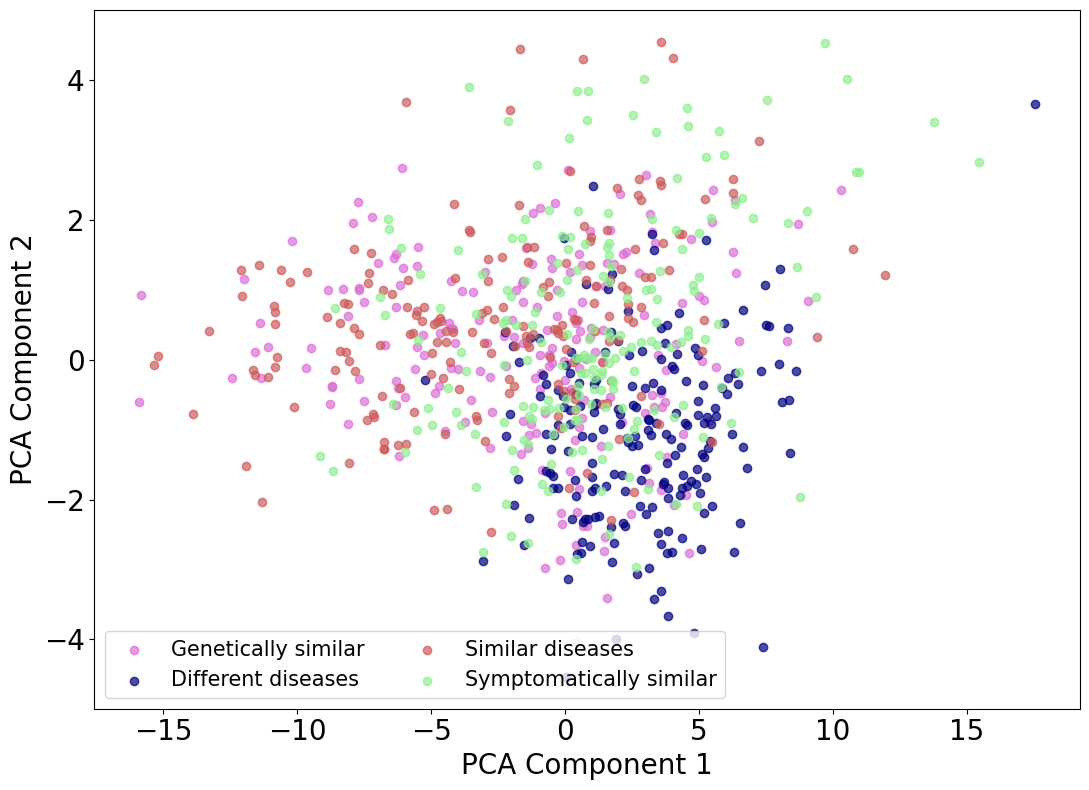

In [8]:
X = all_layers_categories_df.drop(columns='group') # Independent variables
y = all_layers_categories_df['group']  # Categorical, dependent variables

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define color mapping
color_mapping = {
    'Genetically similar': 'orchid',
    'Different diseases': 'navy',
    'Similar diseases': 'indianred',
    'Symptomatically similar': 'lightgreen'
}

# Plot
plt.figure(figsize=(11, 8))
for group, color in color_mapping.items():
    plt.scatter(
        X_pca[y == group, 0], 
        X_pca[y == group, 1], 
        label=group, 
        color=color,
        alpha=0.7
    )

# Labels, legend, and formatting
plt.xlabel('PCA Component 1', fontsize=20)
plt.ylabel('PCA Component 2', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=15, ncol=2)
plt.tight_layout()
plt.show()


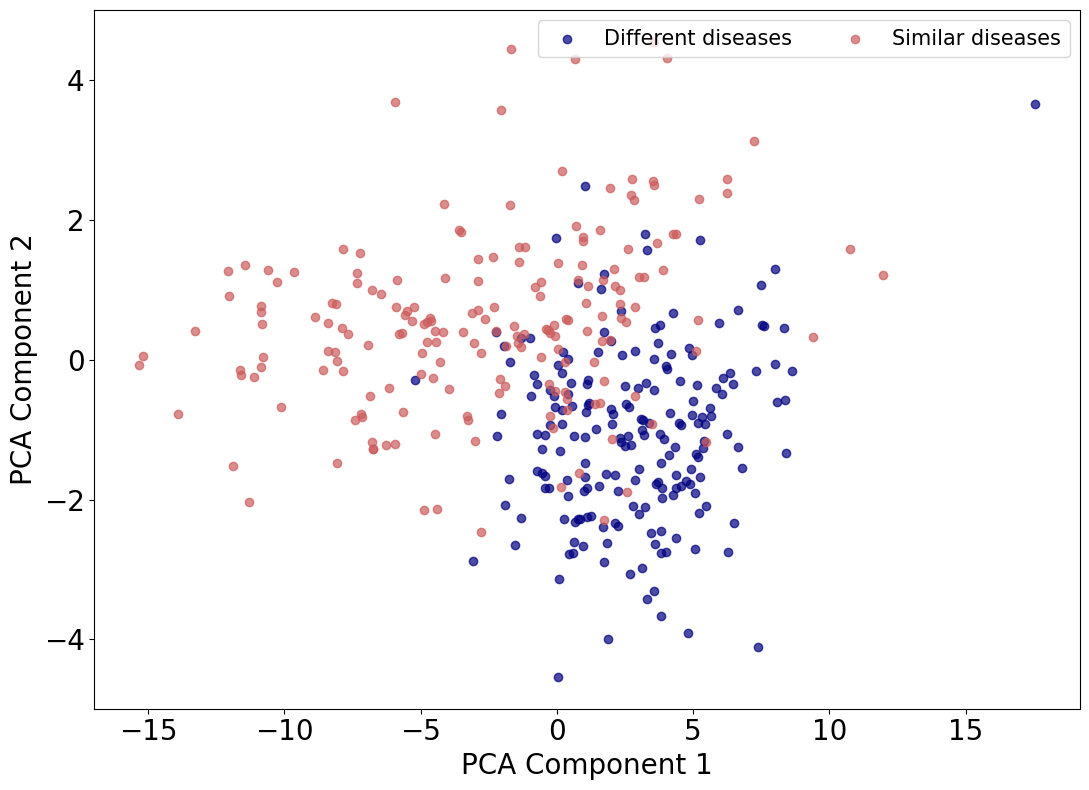

In [27]:
# Extracting only the similar and dissimialr disease data
df_small = all_layers_categories_df[~all_layers_categories_df.isin(['Genetically similar', 'Symptomatically similar'])]

X = df_small.drop(columns='group') # independent variables
y = df_small['group']  # dependent categorical variable

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define color mapping
color_mapping = {
    'Different diseases': 'navy',
    'Similar diseases': 'indianred',
}

# Plot
plt.figure(figsize=(11, 8))
for group, color in color_mapping.items():
    plt.scatter(
        X_pca[y == group, 0], 
        X_pca[y == group, 1], 
        label=group, 
        color=color,
        alpha=0.7  # Add transparency if points overlap
    )

# Labels, legend, and formatting
plt.xlabel('PCA Component 1', fontsize=20)
plt.ylabel('PCA Component 2', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=15, ncol=2)
plt.tight_layout()
plt.show()

## PCA most relevant features

In [11]:
X = all_layers_categories_df.iloc[:, :-1].dropna() 
y = all_layers_categories_df.iloc[:, -1].dropna()  # Get only the categorical variable

# Standardize the features (important step for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=X.shape[1])  # Number of components equals the number of features
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()  # Cumulative variance explained

# Print the explained variance by each component
for i, var_ratio in enumerate(explained_variance_ratio, 1):
    print(f"Principal Component {i}: {var_ratio:.4f} variance explained")

# Print cumulative variance explained by the first two components
print(f"\nCumulative variance explained by the first two components: {cumulative_variance_ratio[1]:.4f}")

Principal Component 1: 0.4707 variance explained
Principal Component 2: 0.0470 variance explained
Principal Component 3: 0.0347 variance explained
Principal Component 4: 0.0294 variance explained
Principal Component 5: 0.0261 variance explained
Principal Component 6: 0.0237 variance explained
Principal Component 7: 0.0207 variance explained
Principal Component 8: 0.0200 variance explained
Principal Component 9: 0.0187 variance explained
Principal Component 10: 0.0162 variance explained
Principal Component 11: 0.0154 variance explained
Principal Component 12: 0.0147 variance explained
Principal Component 13: 0.0142 variance explained
Principal Component 14: 0.0127 variance explained
Principal Component 15: 0.0122 variance explained
Principal Component 16: 0.0118 variance explained
Principal Component 17: 0.0117 variance explained
Principal Component 18: 0.0114 variance explained
Principal Component 19: 0.0108 variance explained
Principal Component 20: 0.0103 variance explained
Principal

In [13]:
# Get the feature loadings
loadings = pca.components_.T 

# Create a DataFrame of loadings
feature_names = X.columns 
loading_df = pd.DataFrame(loadings, index=feature_names, columns=[f'PC{i+1}' for i in range(X.shape[1])])

# Display loadings for the first two principal components
print("Feature loadings for the first two principal components:")
print(loading_df[['PC1', 'PC2']].sort_values(by = 'PC1', ascending = False))

Feature loadings for the first two principal components:
                                   PC1       PC2
Layer                                           
coex_core                     0.170645 -0.011944
coex_ITI                      0.169902  0.071779
coex_THY                      0.168144  0.032072
coex_EMC                      0.167193  0.025629
coex_KDN                      0.167084 -0.112608
coex_LVR                      0.165293 -0.029199
coex_PRS                      0.164679  0.068340
coex_CLT                      0.164668  0.102984
coex_SMU                      0.161153 -0.001576
coex_PNC                      0.160605  0.075838
coex_MSG                      0.159858 -0.004150
ppi                           0.159304 -0.242998
coex_PIT                      0.158736  0.010167
coex_ADV                      0.158497  0.126792
coex_VGN                      0.158088  0.156233
coex_ATA                      0.157610  0.034507
coex_STM                      0.157322  0.138556
coex_BRO    

## UMAP visualissation

/Users/marlene/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


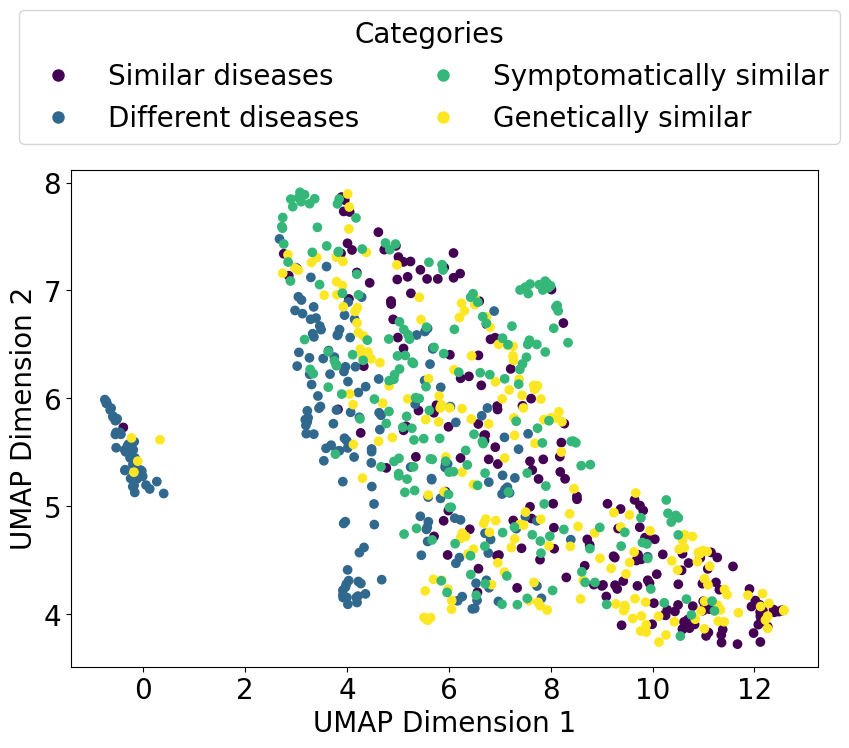

In [16]:
# Reading in the data
X = all_layers_categories_df.fillna(0).iloc[:, :-1].dropna()  # Dependent variables
y = all_layers_categories_df.fillna(0).iloc[:, -1].dropna()   # Categorical variable

# Defining order of categories
custom_order = ['Similar diseases', 'Different diseases', 'Symptomatically similar', 'Genetically similar']
y = pd.Categorical(y, categories=custom_order, ordered=True)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform UMAP to reduce to 2 dimensions
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(9, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=pd.Categorical(y).codes, cmap='viridis')

# Creating legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=scatter.cmap(scatter.norm(index)), markersize=10)
           for index, label in enumerate(custom_order)]

# Add the legend to the plot
plt.legend(handles=handles, title="Categories", fontsize=20, title_fontsize=20,
           loc='upper center', ncols=2, bbox_to_anchor=(0.48, 1.35, 0, 0))

# Adding labels and their sizes
plt.xlabel('UMAP Dimension 1', fontsize=20)
plt.ylabel('UMAP Dimension 2', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

/Users/marlene/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


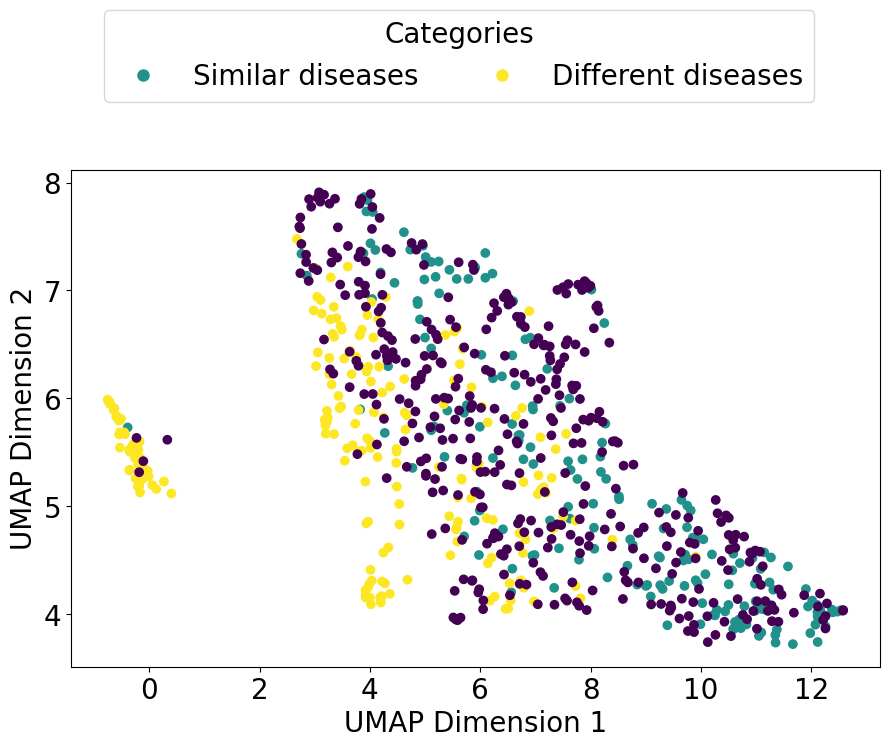

In [22]:
# Reading in the data
small_df = all_layers_categories_df[~all_layers_categories_df.isin(['Genetically similar', 'Symptomatically similar'])]
X = small_df.fillna(0).iloc[:, :-1].dropna()  # Dependent variables
y = small_df.fillna(0).iloc[:, -1].dropna()   # Categorical variable

# Defining order of categories
custom_order = ['Similar diseases', 'Different diseases']
y = pd.Categorical(y, categories=custom_order, ordered=True)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform UMAP to reduce to 2 dimensions
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(9, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=pd.Categorical(y).codes, cmap='viridis')

# Creating legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=scatter.cmap(scatter.norm(index)), markersize=10)
           for index, label in enumerate(custom_order)]

# Add the legend to the plot
plt.legend(handles=handles, title="Categories", fontsize=20, title_fontsize=20,
           loc='upper center', ncols=2, bbox_to_anchor=(0.48, 1.35, 0, 0))

# Adding labels and their sizes
plt.xlabel('UMAP Dimension 1', fontsize=20)
plt.ylabel('UMAP Dimension 2', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

In [26]:
set(all_layers_categories_df['group'])

{'Different diseases',
 'Genetically similar',
 'Similar diseases',
 'Symptomatically similar'}